
# Manifold Learning # 
### *Introduction to Dimensionality Reduction and the Manifold Hypothesis*
Drew Wilimitis

![KleinDual](https://user-images.githubusercontent.com/16658498/55211718-3e737900-51bb-11e9-8a4a-37ecf83c9ab0.gif)


In this series of Jupyter Notebooks, I present the mathematical details of several Manifold Learning algorithms alongside some applied examples using the scikit-learn manifold package. I begin with this introduction of the topology of data and the manifold hypothesis in non-linear dimensionality reduction.   



Contents
------


* **Intro: Geometry of Machine Learning**
    - Mathematical overview and connections between topology and machine learning
    - The manifold learning hypothesis

* **Part 1: Multidimensional Scaling**
    - Classical, metric, and non-metric MDS algorithms
    - Example applications to quantitative psychology and political science
    
* **Part 2: Isomap**
    - Notions of isometry and the kNN graph
    - Geodesic distances and the incorporation of Multidimensional Scaling

* **Part 3: Local Linear Embedding**
    - LLE and its relationship to local PCA
    - Pros/cons compared to previous algorithms


## The Topology of Data

To get an idea of the theoretical foundation for applied dimensionality reduction, we start very generally with topology and the notion of a *mathematical space*.

A **topological space** is defined only in terms of set theory, and therefore provides a very general way to define a *mathematical space* - which is really just a set with some additional structure. A **topological space** is defined as a set with a collection of open neighborhoods that follow a few basic axioms.

From this definition of a topological space, we add additional structure, such as a metric, that allows us to characterize the relationships between elements of the set. Since notions of similarity and distance, which we formalize as metrics, are central to geometry, machine learning tasks, and especially manifold learning algorithms, we formally define a **metric space**. 

A **metric space** is a pair $(M, d)$ where $M$ is a set and $d$ is a metric on $M$, where a metric is a function $d : M \times M \rightarrow \mathbb{R}$ <br>
such that for any $x, y, z \in M$ we have:

$$
\begin{array}{ll}{d(x, y)=0 \Leftrightarrow x=y} \ \ \ {\text { identity }} \\ {d(x, y)=d(y, x)} \ \ \ {\text { symmetry }} \\ {d(x, z) \leq d(x, y)+d(y, z) \ \ \ \text { triangle inequality }}\end{array}
$$

The metric function has these rules that we would expect for distances. Just like we can't have negative distance, we also have $d(x, y) \geq 0$:
$$
\begin{array}{ll}{d(x, y)+d(y, x) \geq d(x, x)} & {\text { by triangle inequality }} \\ {d(x, y)+d(x, y) \geq d(x, x)} & {\text { by symmetry }} \\ {2 d(x, y) \geq 0} & {\text { by identity  }} \\ {d(x, y) \geq 0} & {\text { non-negativity }}\end{array}
$$

![title](https://i.stack.imgur.com/CWRld.png)

This figure shows open unit neighborhoods or 'unit balls' centered at the origin for different metric spaces, where the neighborhoods are defined as the set of elements within a given radius $\varepsilon$: <br>
<br>
$$B_{\varepsilon}(x) :=\{y \in M | d(x, y)<\epsilon\}$$ <br>
For the unit neighborhood we let $\varepsilon = 1$. From left to right we have the metric spaces $(\mathbb{R^2}, d)$ with the following metrics: <br>
$d_2(x, y)=\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}$ (referred to as the Euclidean metric or $\ell_2$ norm) <br>
$d_{\infty}(x, y)=\max \left(\left|x_{1}-y_{1}\right|,\left|x_{2}-y_{2}\right|\right)$ (maximum metric or $\ell_{\infty}$ norm)<br>
$d_1(x, y)=\left|x_{1}-y_{1}\right|+\left|x_{2}-y_{2}\right|$ (taxicab metric or $\ell_{1}$ norm) <br>
<br>
Although the Euclidean metric is often standard, there are many cases in machine learning where the specification of the metric is crucially important. Specifying the $\ell_1$ or $\ell_2$ norm defines regularization techniques like LASSO and Elastic Net for penalized regression. Many methods in dimensionality reduction and unsupervised learning consider local neighborhoods, which are dependent on the metric and this is often critical to learning geometric and topological properties.

With the definition of metric spaces, we can continue to build up from general topological spaces and begin to define concepts that are based on distances, like continuous functions and convergence, eventually getting to more familiar notions of limits and the study of calculus. <br>

Just like metric spaces are just topological spaces with this additional metric structure, a **manifold** is also just a topological space with the additional property that for each point, the surrounding neighborhood locally resembles Euclidean space.

More formally, each point of an n-dimensional **manifold** has an open neighborhood that is *homeomorphic* to an open neighborhood of Euclidean space with dimension n. <br>
<br>
A *homeomorphism* is a function $f : X \rightarrow Y$ between two topological spaces where: <br>
<br>
$$
\begin{array}{l}{\cdot f \text { is a bijection (one-to-one and onto) }} \\ {\cdot f \text { is continuous }} \\ {\cdot \text { the inverse function } f^{-1} \text { is continuous } }\end{array}
$$

A homeomorphism is a continuous bijection (where the inverse is also continuous). We say the two topological spaces are *homeomorphic* if there exists a *homeomorphism* between them. <br>
<br>
**Note**: an n-dimensional manifold is only *locally* homeomorphic to Euclidean space, and in general a manifold is not necessarily globally homeomorphic to Euclidean space. <br>
**Note**: a manifold can also have additional properties like a metric and differentiability.

Two spaces that are homeomorphic have the same topological properties like compactness and connectedness (the word homeomorphic means "same shape"). Although they are not precisely the same, a homeomorphism can be thought of in a similar way as a continuous deformation - the continuous stretching and bending that preserves topological equivalence. One can often imagine stretching or flattening out local neighborhoods of a manifold to get a flat Euclidean plane. <br>
<br>
Since a homeomorphism is a continuous bijection with a continuous inverse, we can jump back and forth between these topological spaces.

![title](https://user-images.githubusercontent.com/16658498/56078890-a7114700-5db2-11e9-8a9e-57dd88f91e37.png)


### 1D Manifolds - Curves

An n-dimensional manifold in a larger m-dimensional space ($n < m$) locally resembles an n-dimensional Euclidean hyperplane. <br>
<br>
Many simple curves in $\mathbb{R^2}$ are locally homeomorphic to 1-dimensional Euclidean space, and we can imagine some straightforward examples of these 1D manifolds.

The unit circle in $\mathbb{R^2}$ is a 1-dimensional manifold, but a 'figure eight' curve in $\mathbb{R^2}$ is not a 1-dimensional manifold since it is not locally homeomorphic to Euclidean space at the center crossing point.
<br>

We have more examples from conics sections: circles, parabolas, hyperbolas, and ellipses.

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Conics_and_cubic.svg/220px-Conics_and_cubic.svg.png) <br>
Figure source: https://en.wikipedia.org/wiki/Manifold

These 1D manifolds don't have to be connected, like the manifold defined as the union of the two circles where the local homeomorphism criteria still holds. Manifolds also don't have to be finite, like the hyperbolas that extend out infinitely. 


### 2D Manifolds - Surfaces

![title](https://user-images.githubusercontent.com/16658498/56078883-99f45800-5db2-11e9-8adb-84f4a5c98aa7.PNG)
Figure source: Renze, John; Rowland, Todd; and Weisstein, Eric W. "Compact Manifold." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/CompactManifold.html

Many familiar closed surfaces like the sphere, torus, and Klein bottle in $\mathbb{R^3}$ are locally homeomorphic to 2-dimensional Euclidean space, and so these are all 2-dimensional manifolds. You can imagine a tangent plane approximating the local neighborhoods at each point on these surfaces, or flattening out a small patch of the sphere's surface so that it lies along the Euclidean plane in $\mathbb{R^2}$. 

Globally, however, these surfaces are generally not going to be homeomorphic to $\mathbb{E^2}$. You can't find a homeomorphism between the sphere and the Euclidean plane. Intuitively, you can't twist or stretch the sphere continuously to lie flat along the plane (without squishing it to a single point or folding it on top of itself - which are not bijective transformations)


### n-Manifolds

<div class="alert alert-block alert-info">
<b>Ex. Euclidean Space</b> <br>
    <br>
    $\mathbb{E}^n$ is an n-dimensional manifold, since it is homeomorphic to itself
</div>

<div class="alert alert-block alert-info">
<b>Ex. n-Sphere</b> <br>
    <br>
    $S^{n}=\left\{x \in \mathbb{R}^{n+1} :\|x\|=r\right\}$ is an n-dimensional manifold
</div>

<div class="alert alert-block alert-info">
<b>Ex. n-Torus</b> <br>
    <br>
    The n-Torus is an n-dimensional manifold
</div>

**Big Idea of Manifolds**: The relationship between local and global properties is crucial to the definition of manifolds, and it's interesting to think how this might allow these particular topological spaces to convey global structure from local properties.


### The Idea Behind Topological Data Analysis

We usually consider data as a finite set $X=\left\{x_{1}, x_{2}, \cdots, x_{N}\right\} \subset \mathbb{R}^{D}$ sometimes called a point cloud. However, geometric and topological structures like metric spaces and manifolds are continuous, not discrete. To discover any geometric or topological properties of the data, we must fit a continuous shape to the data.  <br>
<br>
Since topological properties are those that remain constant with continuous deformations, we can apply an embedding transformation to map the data into lower dimensional spaces. This then allows for visualization and a greater understanding of the latent structure that characterizes the data. Since manifolds have the additional property that they are locally homeomorphic to Euclidean space, we can find an embedding transformation of local neighborhoods to form a lower dimensional standard *Euclidean* space, while preserving the topology of the data.   

For this geometric and topological information to be useful, this underlying continuous shape needs to reveal important features of the data and the noise of the data samples needs to be relatively low. To further understand the utility of topological approaches and how they can uncover highly complex and informative features, we must first consider the challenges of analyzing high dimensional data. 


## The Curse (and Blessing) of Dimensionality

> **The Curse of Dimensionality** refers to the various challenges that arise when applying data analysis and machine learning methods to high dimensional datasets.

As the dimensionality of a dataset increases, the volume of the high dimensional space grows exponentially. The available data can become very sparse in relation to higher dimensional volumes, where essentially all the data points become further and further apart. This makes machine learning tasks that rely on identifying feature interactions and similarities in groups of data, like clustering, extremely hard and often computationally intractable. 


### <font color='blue'> Example - Sampling uniformly within n-dimensional unit spheres </font>

Consider data sampled uniformly within the unit sphere of dimension $n$: <br> 
<br>
$$\mathbf{B}^{n}=\left\{\left(x_{1}, x_{2}, \ldots, x_{N}\right) \in \mathbb{R}^{n} | x_{1}^{2}+x_{2}^{2}+\cdots+x_{N}^{2}<1\right\}$$

Below we sample uniformly within the 2 and 3-dimensional unit spheres. We consider neighborhoods centered at the origin and the proportion of samples that lie within the neighborhood.

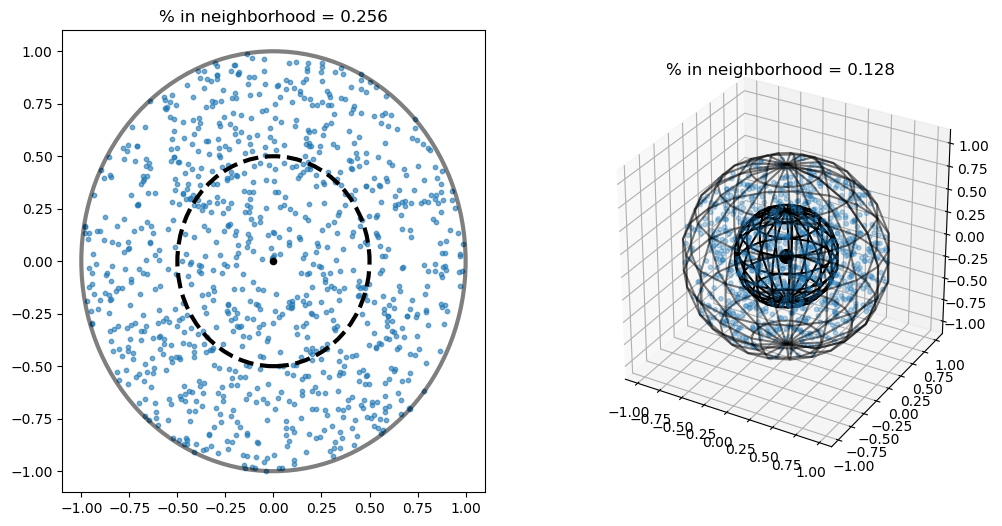

In [801]:
# import libraries
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.pylabtools import figsize
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
figsize(12, 6)

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

# plot unit circle in R^2
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='black', facecolor='None', linewidth=3, alpha=0.5)
ax.add_patch(circ)
circ = plt.Circle((0, 0), radius=0.5, edgecolor='black', facecolor='None', linewidth=3, linestyle='--')
ax.add_patch(circ)

# sample within unit sphere in R^2
n = 1000
theta = np.random.uniform(0, 2*math.pi, n)
u = np.random.uniform(0, 1, n)
r = np.sqrt(u)

x = r * np.cos(theta)
y = r * np.sin(theta)
ax.scatter(x, y, s=10, alpha=0.6)

# proportion within neighborhood
p = np.sum((x**2 + y**2) <= 0.5**2) / n
ax.scatter(0, 0, s=20, c='black')
plt.title("% in neighborhood = " + str(p))

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_aspect("equal")

# plot unit sphere in R^3
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="black", alpha=0.5)
ax.plot_wireframe(0.5*x, 0.5*y, 0.5*z, color="black")

# uniform sampling
n = 1000
phi = np.random.uniform(0, 2*math.pi, n)
costheta = np.random.uniform(-1, 1, n)
u = np.random.uniform(0, 1, n)

theta = np.arccos(costheta)
r = u**(1/3)

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)
ax.scatter(x, y, z, alpha=0.3, s=10)

# proportion within neighborhood
p = np.sum((x**2 + y**2 + z**2) <= 0.5**2) / n
ax.scatter([0], [0], [0], color="black", s=100)
plt.title("% in neighborhood = " + str(p));

In $\mathbb{R^2}$ the unit sphere has volume $V = \pi \cdot r^2$

If we let p = % of samples within the neighborhood, we have p approximately equal to the volume of the neighborhood divided by the volume of the unit sphere. For $r = \frac{1}{2}$ we have $p \approx (\frac{1}{2})^2 = \frac{1}{4}$

In $\mathbb{R^3}$ the unit sphere has volume $V = \frac{4}{3} \pi \cdot r^3$ and so for $r = \frac{1}{2}$ we have $p = (\frac{1}{2})^3 \approx \frac{1}{8}$

In $\mathbb{R^n}$, the unit sphere has volume that increases exponentially with a given fixed radius:
$$
V_{n}(R)=\frac{\pi^{\frac{n}{2}}}{\Gamma\left(\frac{n}{2}+1\right)} R^{n}
$$

where in the denominator we have the Gamma function: <br>
$$\Gamma(n)=(n-1) ! \text { if } n \text { is a positive integer }$$

In 10 dimensions we have the volume $$
V = \frac{\pi^{5}}{120} R^{10} \approx 2.550 \times R^{10}
$$

and so if the radius is 1/2, the proportion of samples within our neighborhood $p \approx 2.43^{-3}$

To have the neighborhood contain approximately 1/4 of the samples like the sphere in $\mathbb{R^2}$ we need to have $r \approx 0.8$ which is nearly the size of the whole dataset. Clustering tasks become nearly impossible when the data points are so far away and near the boundary, and the volume of the high dimensional space becomes so enormous. We would need training samples that grow exponentially with the dimensionality, which quickly becomes computationally intractable.

There are many methods in machine learning that attempt to reduce the dimensionality of high dimensional datasets. In some sense, they all rely on exploiting the intrinsic structure of the data, where the dataset lies closely to a lower dimensional subspace embedded within the higher dimensional space. Empirically, high dimensional data sets are not sampled uniformly, and so there are special structures like many data points being very close together in one of the dimensions. 

This fact that higher dimensional datasets often have some intrinsic lower dimensionality is what I refer to as this blessing of dimensionality. 


### <font color='blue'> Example - MNIST Digits </font>

Many datasets are actually very very far from being sampled uniformly over some domain. Consider a classification problem with the MNIST handwritten digits dataset.

In [143]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

C:\Users\dreww\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dreww\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [144]:
X = mnist['data']
y = mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
mnist.data.shape

(70000, 784)

We have 70000 handwritten digits 0-9, where each observation is an image with $28*28 = 784$ features that can take values representing pixel intensities from 0 to 255. Here is a plot of some examples:

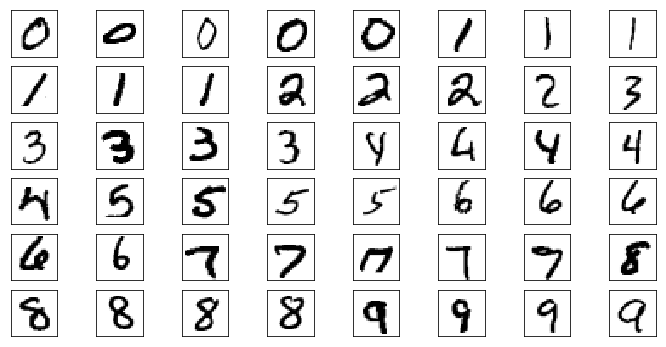

In [145]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r');

If you imagine generating random images by sampling uniformly over this 784 dimensional space, the probability that you would generate an image resembling a handwritten digit is unbelievably small. There's some intrinsic structure to this dataset that could allow for dimensionality reduction, such as all the digits being centered and the corners being almost all white, common line segments and loops, and a bimodal distribution of pixel values where they are usually either black or white.  

With these constraints there's significantly less degrees of freedom. If we have to predict the target class of a new validation sample, we know a lot already about the $28*28 = 784$ feature values simply because we know we're predicting handwritten digits in this problem. This is the case with many other high dimensional datasets as well. For example, in an image classification task for a dataset with images of animals, samples will have discernible objects and probably some common structures like eyes, ears, tails, etc.   


## The Manifold Hypothesis

Since many real datasets lie close to some lower dimensional subspace, many techniques for dimensionality reduction are also based on assuming a lower dimensional manifold representation. 

> The **manifold hypothesis**, or **manifold assumption**, is that many real-world datasets can be approximately represented as lower dimensional manifolds that are embedded in a higher dimensional space.

**Manifold learning** is a class of methods developed to learn this lower dimensional representation, sometimes referred to as the intrinsic dimensionality, of the data. <br>
<br>
In manifold learning, the data points $x_1, x_2, ..., x_N$ are assumed to be sampled from the distribution defined by the underlying d-dimensional manifold $M \subset \mathbb{R}^{D}$. We then attempt to learn the intrinsic structure of this underlying manifold. This is can all be quite abstract, but below is a more concrete example of a 3-dimensional dataset that lies close to a nonlinear, 2-dimensional manifold.

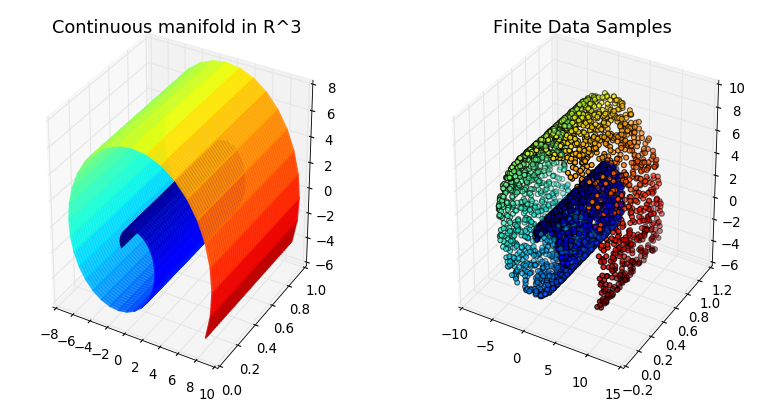

In [803]:
from IPython.core.pylabtools import figsize
figsize(16, 12)
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

# draw samples to create the grid
t = np.linspace(0, 1, 50)
u = np.linspace(0, 1, 50)
v = 3*np.pi/2*(.1 + 2*t)
u,v = np.meshgrid(u,v)

# swiss roll transformation
x = -v*np.cos(v)
y = u
z = v*np.sin(v)

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# plot 3d surface
colors = plt.cm.jet((x**2 + z**2) / 100)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=colors, cmap=plt.cm.coolwarm, linewidth=1.4, alpha=0.8)
ax.set_title('Continuous manifold in R^3', size=16);

# draw uniform samples from the continuous manifold
n = 4000
t = np.random.rand(n, 1)
u = np.random.rand(n, 1)
v = 3*np.pi/2*(.1 + 2*t)

x = -v*np.cos(v)
y = u
z = v*np.sin(v)
color = (x**2 + z**2) / 100
color = color.reshape(n,)

# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x, y, z, cmap=plt.cm.jet, c=color);
ax.set_title('Finite Data Samples', size=16);
plt.show();

Statistical considerations must be taken into account when we try to uncover a latent manifold structure for our dataset. When we assume the data lies close to this embedded manifold, we view the collection of data points we have to be a finite sample drawn from the continuous distribution of the manifold. <br>
<br>
Therefore, statistical methods can be applied to estimate the true topological features of the manifold based on our observed, finite data samples. The bias and variance can be assessed along with whether the noise in our dataset allows us to derive statistically significant claims about the assumed manifold geometry.   

Two related problems that arise are significant levels of noise in the input data and insufficient sampling that under-represents important regions. Consider how introducing a little noise seems to obfuscate the latent manifold geometry.

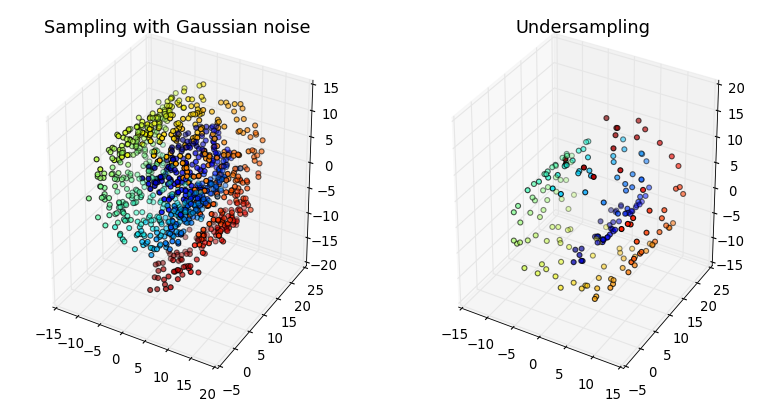

In [804]:
# draw samples with sparsity and noise

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# sample from swiss roll dataset
from sklearn.datasets.samples_generator import make_swiss_roll
X, color = make_swiss_roll(n_samples = 1000, noise=1)
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], -X[:, 2], c=color, cmap=plt.cm.jet)
ax.set_title('Sampling with Gaussian noise', size=16)

# undersample from manifold
X, color = make_swiss_roll(n_samples = 200, random_state=8888)
ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)
ax.set_title('Undersampling', size=16);
plt.show();

Manifold learning is intriguing and insightful in its own right and it offers a valuable way to understand and visualize latent geometries and invariant structural relationships. An implicit assumption in most of these methods is that they will assist supervised learning problems. Manifold learning is often incorporated in supervised learning problems as an exploratory analysis/visualization, feature extraction method, and for non-linear dimensionality reduction.<br>
<br>
It can be hard to know whether non-linear dimensionality reduction will simplify a machine learning task, and this isn't always the case, but often times classification and regression problems are easier after applying lower dimensional embeddings. Below is an example of manifold learning simplifying a basic classification problem.

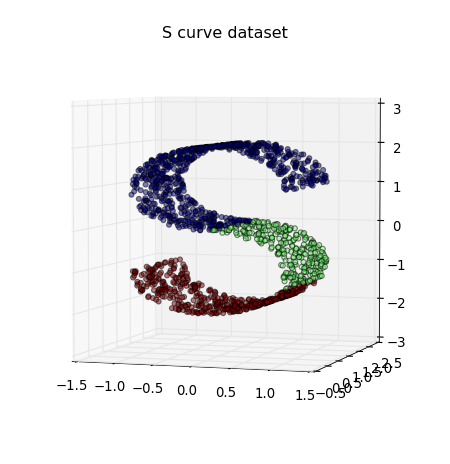

In [808]:
from sklearn.datasets.samples_generator import make_s_curve
data, color = make_s_curve(1500)
x = data[:, 0] 
y = data[:, 1]
z = data[:, 2]

color[(color < 0)] = -1
color[(color > 0) & (color <= 2)] = 0
color[(color > 2)] = 1

fig = plt.figure(figsize = (7, 7))
ax = fig.gca(projection = '3d')
ax.scatter(x, y, z, c=color, cmap=plt.cm.jet, alpha=0.5)
plt.title('S curve dataset')
ax.view_init(4, -72);

Notice that in $\mathbb{R^3}$ it would be hard to fit a decision boundary and classify data points. After applying the Isomap manifold learning algorithm (covered in Part 2 of this manifold learning series) to reduce the dimensionality to $\mathbb{R^2}$ and visualize the intrinsic dimensionality, the classification task becomes much easier. The Isomap algorithm is able to learn the shape of the data, and the geometry provides the key insight into the similarities between data points.  

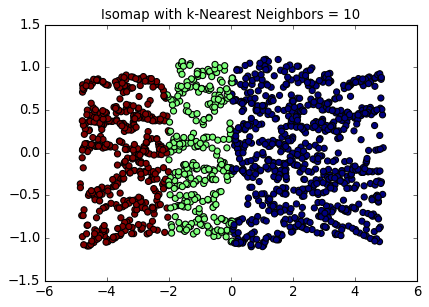

In [809]:
from sklearn.manifold import Isomap
plt.figure(figsize=(6,4))
data = np.hstack((x.reshape(-1,1),y.reshape(-1,1),z.reshape(-1,1)))
k = 10

model = Isomap(n_components=2, n_neighbors=k)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=color, cmap=plt.cm.jet, s=30)
plt.title('Isomap with k-Nearest Neighbors = ' + str(k), size=12)
plt.show();

Now we can easily fit a linear decision boundary to separate the classes

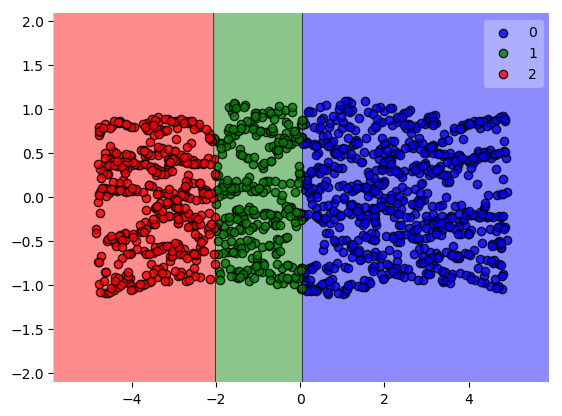

In [810]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
plt.style.use('default')
X = proj
y = color
y = y.astype('int') + 1
tree_clf = tree_clf.fit(X, y)
plot_decision_regions(X, y, clf=tree_clf, legend=1, markers='ooo', colors='blue,green,red');

<br>
There are a few broad classes of these manifold learning algorithms, and the recurring themes provide an excellent entry point to explore topological methods in machine learning and data analysis. There are well-developed implementations of many of these algorithms and some existing demonstrations of their effectiveness on a variety of interesting problems. Throughout this project, I go over some of these non-linear dimensionality reduction and manifold learning methods in more detail, eventually getting into more recent advancements in topological data analysis and information geometry. <br>

___

## References